In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('K-NN.csv')
print(dataset.shape)
print(dataset.head(5))

(400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
import warnings 
from warnings import filterwarnings

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3, metric='minkowski', p =2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.95

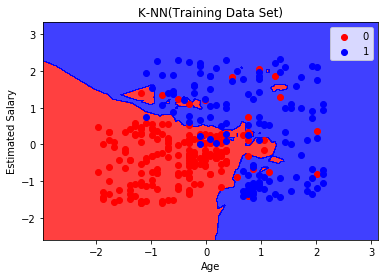

In [7]:
from matplotlib.colors import ListedColormap
#X_set, y_set = X_train, y_train
xx = np.arange(X_train[:,0].min()-1,X_train[:,0].max()+1,step = 0.01)
yy = np.arange(X_train[:,1].min()-1,X_train[:,1].max()+1,step = 0.01)
xy, yx = np.meshgrid(xx,yy)
plt.contourf(xy, yx,knn.predict(np.array([xy.ravel(), yx.ravel()]).T).reshape(xy.shape),alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(xy.min(), xy.max())
plt.ylim(yx.min(), yx.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN(Training Data Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

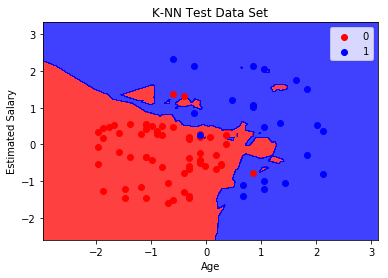

In [8]:
from matplotlib.colors import ListedColormap
#X_set, y_set = X_train, y_train
xx = np.arange(X_test[:,0].min()-1,X_test[:,0].max()+1,step = 0.01)
yy = np.arange(X_test[:,1].min()-1,X_test[:,1].max()+1,step = 0.01)
xy, yx = np.meshgrid(xx,yy)
plt.contourf(xy, yx,knn.predict(np.array([xy.ravel(), yx.ravel()]).T).reshape(xy.shape),alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(xy.min(), xy.max())
plt.ylim(yx.min(), yx.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN Test Data Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()